# Heart Attack Data Analysis & Prediction:

# Objective:
This dataset is used to predict whether a patient is likely to Predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome.
1 = Patient diagnosed with Heart Disease.
0 = Patient not diagnosed with Heart Disease. 


# Attribute Information:

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type :— Value 1: typical angina; Value 2: atypical angina; Value 3: non-anginal pain; Value 4: asymptomatic

trtbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholesterol in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results :- Value '0'- Normal; Value '1'- Having ST-T wave abnormality; Value '2'- showing 

probable or definite left ventricular hypertrophy by Estes’ criteria 20 ekgmo

thalachh: maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slp: the slope of the peak exercise ST segment :— Value '1': upsloping; Value '2': flat; Value '3': downsloping

caa: number of major vessels (0–3) colored by flourosopy

thal: thalassemia :- 3 = normal; 6 = fixed defect; 7 = reversable defect

output: 0(no presence) 1(presence)




In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report

In [14]:
data=pd.read_csv("C:/Users/Asus/Desktop/heart.csv")

# EDA:

In [15]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
data.shape

(303, 14)

In [17]:
data.size

4242

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [26]:
# Rename columns to more understanable attributes
hrt= data.rename(columns={'trtbps':'rest_bp',
                
                'restecg':'rest_ecg',
                'exng':"ex_ang",
                'slp':'slope'
})

In [27]:
hrt.dtypes

age           int64
sex           int64
cp            int64
rest_bp       int64
chol          int64
fbs           int64
rest_ecg      int64
thalachh      int64
ex_ang        int64
oldpeak     float64
slope         int64
caa           int64
thall         int64
output        int64
dtype: object

In [28]:
hrt.nunique()

age          41
sex           2
cp            4
rest_bp      49
chol        152
fbs           2
rest_ecg      3
thalachh     91
ex_ang        2
oldpeak      40
slope         3
caa           5
thall         4
output        2
dtype: int64

In [29]:
hrt.isnull().sum()

age         0
sex         0
cp          0
rest_bp     0
chol        0
fbs         0
rest_ecg    0
thalachh    0
ex_ang      0
oldpeak     0
slope       0
caa         0
thall       0
output      0
dtype: int64

In [30]:
men=hrt.loc[hrt.sex==1]
m=len(men)

In [31]:
women=hrt.loc[hrt.sex==0]
w=len(women)

In [32]:
total=len(hrt['sex'])

In [33]:
rate_men=(m/total)*100

In [34]:
rate_women=(w/total)*100

# Visualisation:

<AxesSubplot:xlabel='age', ylabel='Count'>

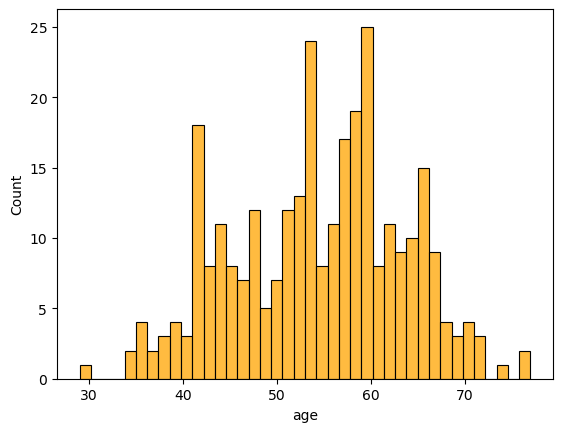

In [35]:
sns.histplot(data=hrt, x='age', bins=40, color='orange')

([<matplotlib.patches.Wedge at 0x27c90adc700>,
 [Text(0.5986246155747552, 0.9228480750524306, 'Percentage of Women'),
  Text(-0.59862452917148, -0.9228481310997081, 'Percenatge of Men')],
 [Text(0.3265225175862301, 0.5033716773013257, '32%'),
  Text(-0.3265224704571709, -0.503371707872568, '68%')])

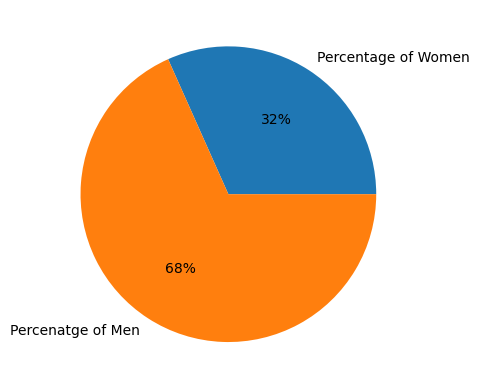

In [36]:
p=[rate_women, rate_men]
labels=['Percentage of Women', 'Percenatge of Men']
plt.pie(p, labels=labels, autopct='%.f%%')

Text(0.5, 1.0, 'Types of Chest Pain')

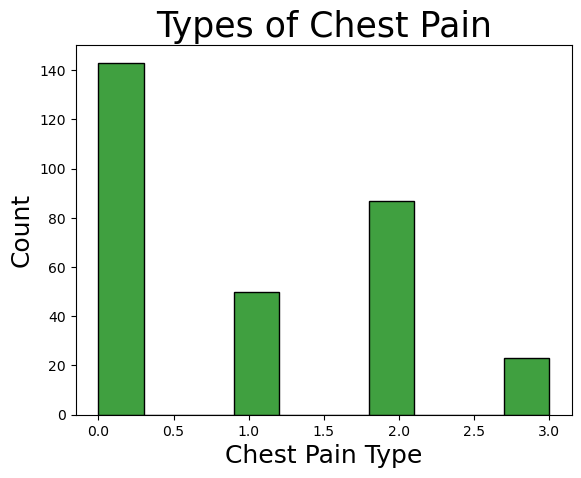

In [37]:
sns.histplot(data=hrt, x='cp', color='green')
plt.xlabel('Chest Pain Type', size=18)
plt.ylabel('Count',size=18)
plt.title('Types of Chest Pain', size=25)

In [38]:
splt_hrt=hrt[["age","chol","rest_ecg","output"]]
splt_hrt

,age,chol,rest_ecg,output
0,63,233,0,1
1,37,250,1,1
2,41,204,0,1
3,56,236,1,1
4,57,354,1,1
...,...,...,...,...
298,57,241,1,0
299,45,264,1,0
300,68,193,1,0
301,57,131,1,0


<AxesSubplot:>

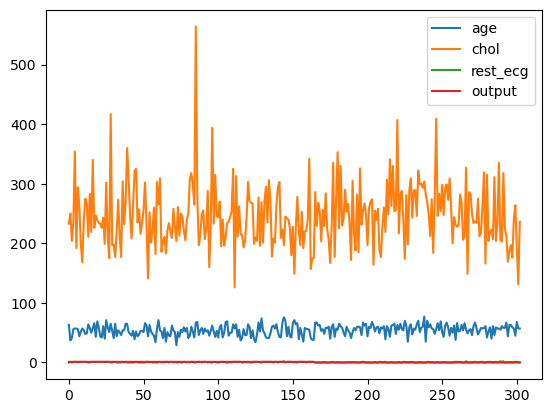

In [39]:
splt_hrt.plot()

In [40]:
hrt_corr = hrt[['age', 'sex', 'cp', 'rest_bp', 'chol', 'fbs', 'rest_ecg', 'thalachh','ex_ang', 'oldpeak', 'slope', 'caa', 'thall', 'output']].dropna().corr()
hrt_corr

,age,sex,cp,rest_bp,chol,fbs,rest_ecg,thalachh,ex_ang,oldpeak,slope,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
ex_ang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

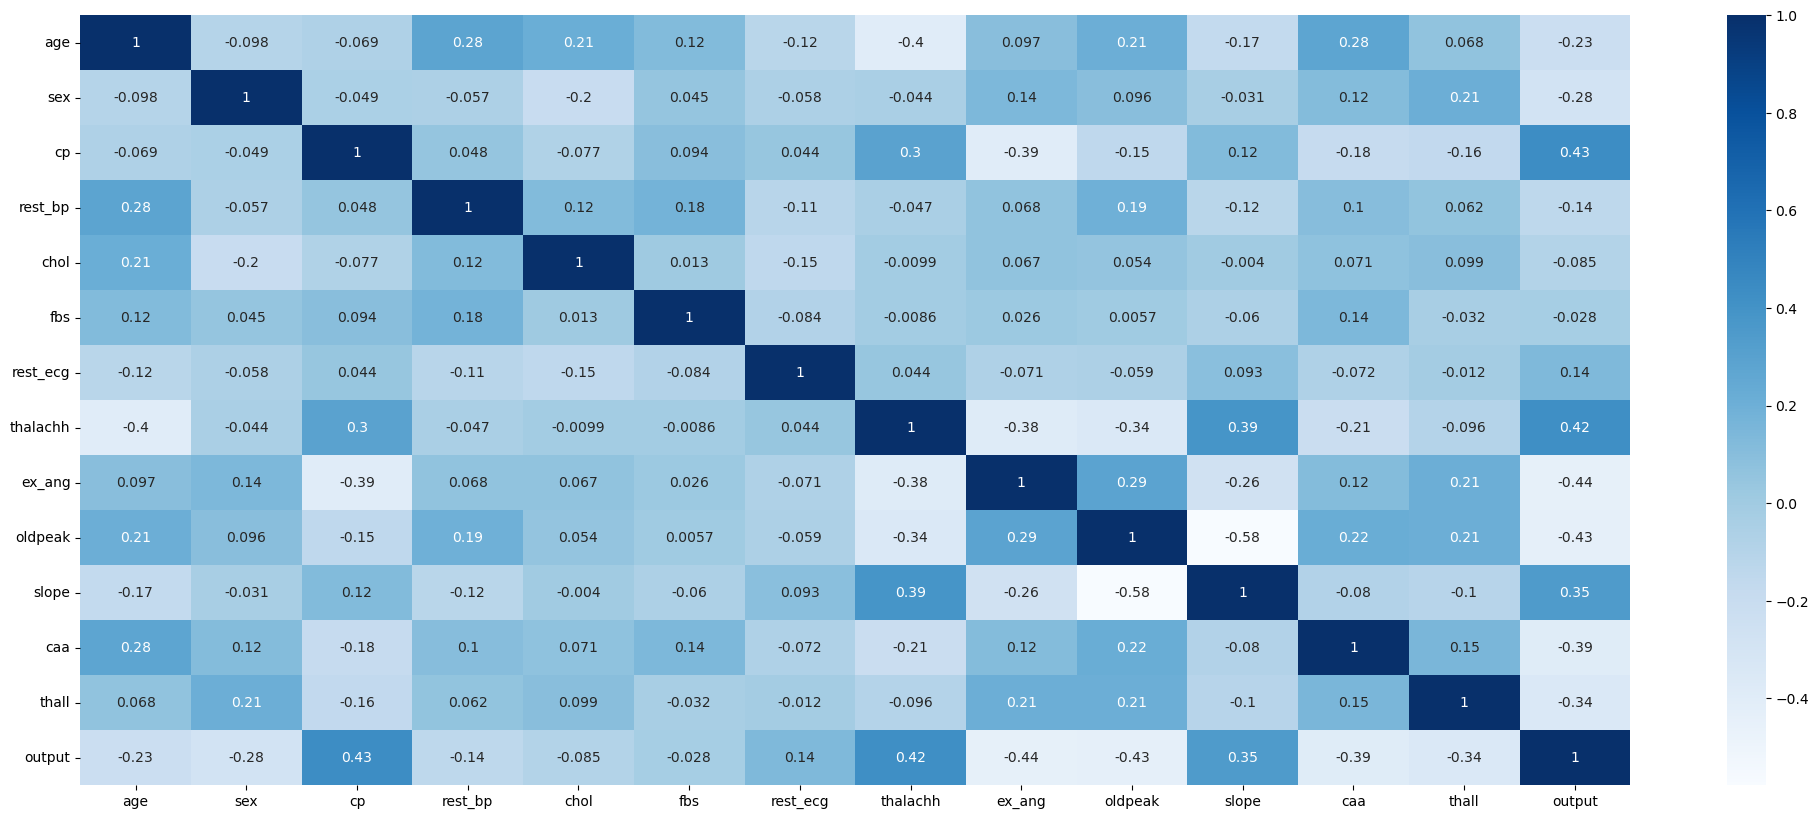

In [41]:
plt.figure(figsize=(25,10))
sns.heatmap(hrt.corr(), annot=True, cmap='Blues')

<AxesSubplot:xlabel='rest_bp', ylabel='age'>

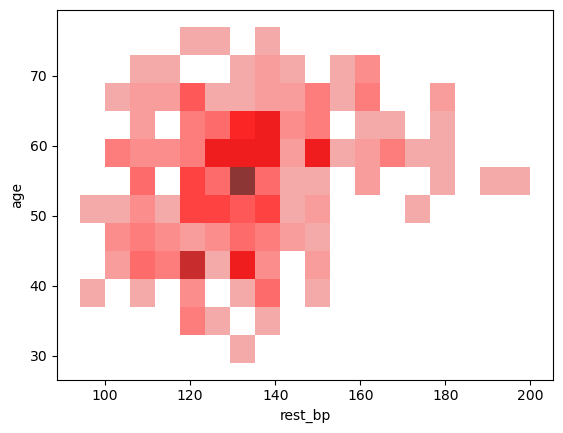

In [42]:
sns.histplot(data=hrt, x='rest_bp', y='age', color='red')


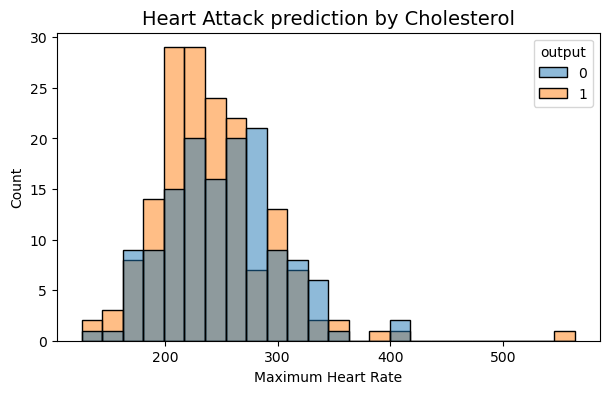

In [43]:
plt.figure(figsize=(7,4))
sns.histplot(data=hrt, x='chol', hue='output')
plt.title('Heart Attack prediction by Cholesterol', fontsize = 14)
plt.xlabel('Maximum Heart Rate', fontsize = 10)
plt.show()

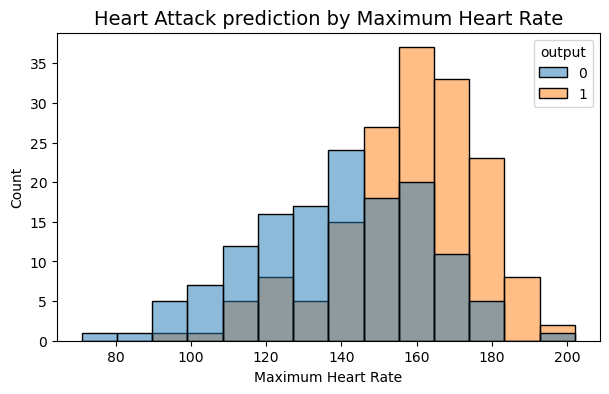

In [44]:
plt.figure(figsize=(7,4))
sns.histplot(data=hrt, x='thalachh', hue='output')
plt.title('Heart Attack prediction by Maximum Heart Rate', fontsize = 14)
plt.xlabel('Maximum Heart Rate', fontsize = 10)
plt.show()

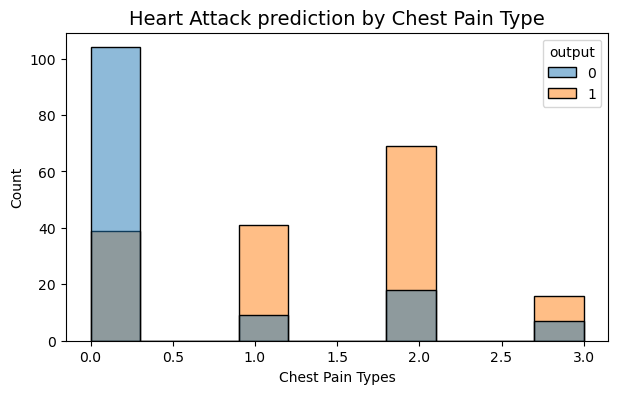

In [45]:
plt.figure(figsize=(7,4))
sns.histplot(data=hrt, x='cp', hue='output')
plt.title('Heart Attack prediction by Chest Pain Type', fontsize = 14)
plt.xlabel('Chest Pain Types', fontsize = 10)
plt.show()

# Splitting The Data:

In [46]:
X=hrt.iloc[:, :13]
y=hrt.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression:

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression()

In [49]:
lr.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = lr.predict(X_test)

In [51]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [52]:
lr.score(X_test,y_test)

0.8524590163934426

# XG Boost Classifier:

In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
y_pred_xgb = xgb.predict(X_test)

In [55]:
cl_rep = classification_report(y_test, y_pred_xgb)

In [56]:
print(cl_rep)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



# Conclusions :

Most people with a high heart rate are more prone to having heart attack.

Individuals who are at a higher risk of having heart attack have non-anginal pain and atypical angina pain.

Most of the individuals between the ages 42-55 are at a higher risk of heart attack.

There is a weak negative correlation between sex and chance of having heart attack.

When Major Vessel is 0 then risk of heart attack is more.

Cholestrol levels are not a strong indicator for heart attack.
